<h1><font color="blue"> Loan Data from Prosper - Communicate Data Findings</font></h1>

### by Michaela C

## Introduction

#### About Prosper
Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than $ \$19$ billion in loans to more than 1,110,000 people.<br>
Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between $\$2,000$ and $\$40,000$. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.
More: https://www.prosper.com/about

#### About Dataset
This data set (prosperLoanData.csv) contains 113 937 loans in the period 9.11.2005 - 10.3.2014.  Dataset contains 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Additional explanatory file on these variables is called prosper_LoanData_explain_variables.csv and this jupyter notebook file should be distributed with it.


## Questions for analysis

What factors affect a loan’s outcome status?


What affects the borrower’s APR or interest rate?


Are there differences between loans depending on how large the original loan amount was?


## Preliminary Wrangling


### Data Gathering 

In [92]:
# imports and load data
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

import seaborn as sb

from matplotlib import rcParams

df=pd.read_csv('prosperLoanData.csv')
df_explain=pd.read_csv('Prosper Loan Data - Variable Definitions.csv')

### Data  Assesing  and Cleaning

### Assesing

In [93]:
df.head(7)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


Preview the dataset

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Check duplicates

In [95]:
df.duplicated().any()

False

View the statistics of numerical variables


In [96]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


Look at the categorical variable ProsperRating (Alpha)

In [97]:
df['ProsperRating (Alpha)']

0         NaN
1           A
2         NaN
3           A
4           D
         ... 
113932      C
113933      A
113934      D
113935      C
113936      A
Name: ProsperRating (Alpha), Length: 113937, dtype: object

In [98]:
df.loc[pd.DatetimeIndex(df['ListingCreationDate']).year < 2009,  'CreditGrade'].count()


28940

In [99]:
df.loc[pd.DatetimeIndex(df['ListingCreationDate']).year > 2009,  'CreditGrade'].value_counts()


Series([], Name: CreditGrade, dtype: int64)

In [100]:
df.loc[pd.DatetimeIndex(df['ListingCreationDate']).year < 2009,  'CreditGrade'].value_counts()
    

C     5644
D     5151
B     4386
AA    3508
HR    3508
A     3313
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [101]:
df.loc[pd.DatetimeIndex(df['ListingCreationDate']).year > 2009,  'ProsperRating (Alpha)'].value_counts()


C     17920
B     15471
A     14042
D     13902
E      9584
HR     6704
AA     5052
Name: ProsperRating (Alpha), dtype: int64

In [102]:
(pd.DatetimeIndex(df['ClosedDate'])- pd.DatetimeIndex(df['ListingCreationDate'])).max()

Timedelta('2018 days 16:42:01.660000')

In [103]:
(pd.DatetimeIndex(df['ClosedDate']) -  pd.DatetimeIndex(df['ListingCreationDate'])).min()

Timedelta('-1383 days +11:57:09.893000')

In [104]:
df.loc[pd.DatetimeIndex(df['ListingCreationDate']).year < 2009,  'ProsperRating (Alpha)'].value_counts()


Series([], Name: ProsperRating (Alpha), dtype: int64)

In [105]:
df.loc[((pd.DatetimeIndex(df['ListingCreationDate']).year == 2009) & (pd.DatetimeIndex(df['ListingCreationDate']).month >7)), 'CreditGrade'].value_counts()

Series([], Name: CreditGrade, dtype: int64)

In [106]:
df.loc[((pd.DatetimeIndex(df['ListingCreationDate']).year == 2009) & (pd.DatetimeIndex(df['ListingCreationDate']).month <7)), 'ProsperRating (Alpha)'].value_counts()

Series([], Name: ProsperRating (Alpha), dtype: int64)

In [107]:
df.loc[((pd.DatetimeIndex(df['ListingCreationDate']).year == 2009) & (pd.DatetimeIndex(df['ListingCreationDate']).month >= 6)), 'CreditGrade'].value_counts()

Series([], Name: CreditGrade, dtype: int64)

**We can see, that variable "CreditGrade" was changed with "ProsperRating(Alpha)" in June 2009. Both variables are ordinal.**

Exploration by value_counts()

In [108]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [109]:
df['CurrentCreditLines'].value_counts()

8.0     8985
7.0     8945
9.0     8731
10.0    8152
11.0    7500
6.0     7449
12.0    6530
5.0     6367
13.0    5677
14.0    4927
4.0     4804
15.0    3985
3.0     3553
16.0    3468
17.0    2619
2.0     2467
18.0    2242
19.0    1730
20.0    1377
1.0     1351
21.0    1068
22.0     828
23.0     670
24.0     563
25.0     446
0.0      385
26.0     348
27.0     251
28.0     205
29.0     145
30.0     119
31.0      91
32.0      75
33.0      62
35.0      40
34.0      39
36.0      34
37.0      23
38.0      23
39.0      13
40.0      10
41.0       8
44.0       4
54.0       3
45.0       3
47.0       3
52.0       3
42.0       3
48.0       3
56.0       2
51.0       1
59.0       1
43.0       1
46.0       1
Name: CurrentCreditLines, dtype: int64

In [110]:
df['EmploymentStatusDuration'].value_counts()

0.0      1534
4.0      1186
1.0      1177
3.0      1174
2.0      1153
         ... 
581.0       1
570.0       1
574.0       1
590.0       1
672.0       1
Name: EmploymentStatusDuration, Length: 605, dtype: int64

In [111]:
df['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [112]:
df['LenderYield']

0         0.1380
1         0.0820
2         0.2400
3         0.0874
4         0.1985
           ...  
113932    0.1764
113933    0.1010
113934    0.2050
113935    0.2505
113936    0.0939
Name: LenderYield, Length: 113937, dtype: float64

In [113]:
df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [114]:
df.groupby('IncomeRange')['EmploymentStatus'].value_counts()

IncomeRange     EmploymentStatus
$0              Full-time             290
                Self-employed         257
                Part-time              46
                Not employed           11
                Employed               10
                Retired                 7
$1-24,999       Employed             2652
                Full-time            2006
                Other                 947
                Part-time             717
                Self-employed         654
                Retired               289
                Not employed            9
$100,000+       Employed            12953
                Full-time            2990
                Self-employed        1251
                Other                 128
                Retired                10
                Part-time               4
                Not employed            1
$25,000-49,999  Employed            18368
                Full-time            9865
                Self-employed        1750
 

In [115]:
df.groupby('IncomeRange')['EmploymentStatusDuration'].count()

IncomeRange
$0                  621
$1-24,999          7272
$100,000+         17334
$25,000-49,999    32183
$50,000-74,999    31044
$75,000-99,999    16914
Not displayed       139
Not employed        805
Name: EmploymentStatusDuration, dtype: int64

In [116]:
employed_year=df['EmploymentStatusDuration']/12

In [117]:
employed_year.value_counts()

0.000000     1534
0.333333     1186
0.083333     1177
0.250000     1174
0.166667     1153
             ... 
47.750000       1
46.000000       1
46.666667       1
56.000000       1
50.833333       1
Name: EmploymentStatusDuration, Length: 605, dtype: int64

Employment Status Duration between 1 year - 20 years

In [118]:
((df['EmploymentStatusDuration'] >12) & (df['EmploymentStatusDuration'] <240)).value_counts()

True     81904
False    32033
Name: EmploymentStatusDuration, dtype: int64

In [119]:
df['CurrentCreditLines'].value_counts()

8.0     8985
7.0     8945
9.0     8731
10.0    8152
11.0    7500
6.0     7449
12.0    6530
5.0     6367
13.0    5677
14.0    4927
4.0     4804
15.0    3985
3.0     3553
16.0    3468
17.0    2619
2.0     2467
18.0    2242
19.0    1730
20.0    1377
1.0     1351
21.0    1068
22.0     828
23.0     670
24.0     563
25.0     446
0.0      385
26.0     348
27.0     251
28.0     205
29.0     145
30.0     119
31.0      91
32.0      75
33.0      62
35.0      40
34.0      39
36.0      34
37.0      23
38.0      23
39.0      13
40.0      10
41.0       8
44.0       4
54.0       3
45.0       3
47.0       3
52.0       3
42.0       3
48.0       3
56.0       2
51.0       1
59.0       1
43.0       1
46.0       1
Name: CurrentCreditLines, dtype: int64

In [120]:
df['OpenCreditLines'].value_counts()

7.0     10033
8.0      9556
6.0      9117
9.0      9018
5.0      8090
10.0     7983
11.0     6874
4.0      6153
12.0     5880
13.0     4897
3.0      4690
14.0     4023
15.0     3201
2.0      3195
16.0     2497
17.0     2006
1.0      1708
18.0     1544
19.0     1131
20.0      918
21.0      741
22.0      605
0.0       562
23.0      435
24.0      372
25.0      276
26.0      158
27.0      140
28.0      130
29.0       94
30.0       66
31.0       59
32.0       41
33.0       33
34.0       24
35.0       22
36.0       11
38.0       11
37.0       11
41.0        4
40.0        4
39.0        4
45.0        3
44.0        2
43.0        2
48.0        2
42.0        2
54.0        1
47.0        1
51.0        1
49.0        1
46.0        1
Name: OpenCreditLines, dtype: int64

In [121]:
df['TotalTrades'].value_counts()

17.0     3800
20.0     3775
18.0     3766
19.0     3745
16.0     3728
         ... 
114.0       1
118.0       1
108.0       1
96.0        1
97.0        1
Name: TotalTrades, Length: 108, dtype: int64

In [122]:
df['TradesNeverDelinquent (percentage)']

0         0.81
1         1.00
2          NaN
3         0.76
4         0.95
          ... 
113932    0.83
113933    0.92
113934    1.00
113935    0.80
113936    0.75
Name: TradesNeverDelinquent (percentage), Length: 113937, dtype: float64

In [123]:
df['AvailableBankcardCredit'].value_counts()

0.0        4881
500.0       303
300.0       151
1000.0      145
2000.0      134
           ... 
19357.0       1
37504.0       1
20122.0       1
12742.0       1
13299.0       1
Name: AvailableBankcardCredit, Length: 31829, dtype: int64

### Cleaning


First we make copy of the original dataframe

In [124]:
df1=df.copy()

**1. Quality issue**

Too many variables in df to analyze

**Define**

I will choose variables from all 80 variables, which are important for analysis and which identify the loan, like loan key and date of orginations created/closed.

**Code**

In [125]:
df1=df[['ListingKey','LoanOriginationDate','ClosedDate','LoanStatus','LoanOriginalAmount','Term','MonthlyLoanPayment','BorrowerAPR','LenderYield','CreditGrade','ProsperRating (Alpha)','ProsperRating (numeric)','CurrentCreditLines','OpenCreditLines','DelinquenciesLast7Years','PublicRecordsLast10Years','EmploymentStatus','EmploymentStatusDuration','StatedMonthlyIncome','AvailableBankcardCredit','TotalTrades','AmountDelinquent']]

**Test**

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingKey                113937 non-null  object 
 1   LoanOriginationDate       113937 non-null  object 
 2   ClosedDate                55089 non-null   object 
 3   LoanStatus                113937 non-null  object 
 4   LoanOriginalAmount        113937 non-null  int64  
 5   Term                      113937 non-null  int64  
 6   MonthlyLoanPayment        113937 non-null  float64
 7   BorrowerAPR               113912 non-null  float64
 8   LenderYield               113937 non-null  float64
 9   CreditGrade               28953 non-null   object 
 10  ProsperRating (Alpha)     84853 non-null   object 
 11  ProsperRating (numeric)   84853 non-null   float64
 12  CurrentCreditLines        106333 non-null  float64
 13  OpenCreditLines           106333 non-null  f

**2. Quality issue**

Wrong format of dates 

**Define**

Change loan origination date, date when credit was pulled, and closed date to datetime

**Code**

In [127]:
df1.loc[:,'ClosedDate']=pd.to_datetime(df1.loc[:,'ClosedDate'])
df1.loc[:,'LoanOriginationDate']=pd.to_datetime(df1.loc[:,'LoanOriginationDate'])

**Test**

In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingKey                113937 non-null  object        
 1   LoanOriginationDate       113937 non-null  datetime64[ns]
 2   ClosedDate                55089 non-null   datetime64[ns]
 3   LoanStatus                113937 non-null  object        
 4   LoanOriginalAmount        113937 non-null  int64         
 5   Term                      113937 non-null  int64         
 6   MonthlyLoanPayment        113937 non-null  float64       
 7   BorrowerAPR               113912 non-null  float64       
 8   LenderYield               113937 non-null  float64       
 9   CreditGrade               28953 non-null   object        
 10  ProsperRating (Alpha)     84853 non-null   object        
 11  ProsperRating (numeric)   84853 non-null   float64       
 12  Cu

**2. Quality issue**

Employment status, Credit Grade and Prosper Rating (Alpha) should be categorical variables.

**Define**

use pandas to change EmploymentStatus, CreditCare and Prosper Rating (Alpha) to CategoricalDtype object


**Code**

In [129]:
borrowerEmploymentStatus = df.groupby(['EmploymentStatus'])['LoanOriginalAmount'].count().index
Empclasses = pd.api.types.CategoricalDtype(ordered=True, categories=borrowerEmploymentStatus) #alphabetical ordered
df1.loc[:,'EmploymentStatus']=df1.loc[:,'EmploymentStatus'].astype(Empclasses)

In [130]:
CreditGrade = df.groupby(['CreditGrade']).count().index
credit = pd.api.types.CategoricalDtype(ordered=True, categories=CreditGrade) 
df1.loc[:,'CreditGrade']=df1.loc[:,'CreditGrade'].astype(credit)

In [131]:
index_names= ['HR','E','D','C','B','A','AA']
rating = pd.api.types.CategoricalDtype(ordered=True, categories=index_names) 
df1.loc[:,'ProsperRating (Alpha)']=df1.loc[:,'ProsperRating (Alpha)'].astype(rating)

In [132]:
df1.rename(columns={'ProsperRating (Alpha)':'ProsperRating'}, inplace=True)

**Test**

In [133]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingKey                113937 non-null  object        
 1   LoanOriginationDate       113937 non-null  datetime64[ns]
 2   ClosedDate                55089 non-null   datetime64[ns]
 3   LoanStatus                113937 non-null  object        
 4   LoanOriginalAmount        113937 non-null  int64         
 5   Term                      113937 non-null  int64         
 6   MonthlyLoanPayment        113937 non-null  float64       
 7   BorrowerAPR               113912 non-null  float64       
 8   LenderYield               113937 non-null  float64       
 9   CreditGrade               28953 non-null   category      
 10  ProsperRating             84853 non-null   category      
 11  ProsperRating (numeric)   84853 non-null   float64       
 12  Cu

**4. Quality issue**

"CurrentCreditLines"," OpenCreditLines", "DelinquenciesLast7Years","PublicRecordsLast10Years", "EmploymentStatusDuration" and "TotalTrades" variables are float, but the definition says it should be an integer.

**Define**

These are not possible to change as they null values cannot be changed to integer.

**Code**

In [134]:
#df1.dropna(subset=['CurrentCreditLines','OpenCreditLines','TotalTrades'],inplace=True)

#df1['CurrentCreditLines']=df1['CurrentCreditLines'].astype(np.int64)
#df1['OpenCreditLines']=df1['OpenCreditLines'].astype(np.int64)
#df1['TotalTrades']=df1['TotalTrades'].astype(np.int64)



In [135]:
len(df1[df1['CurrentCreditLines'].isnull()==False])

106333

**Test**

In [136]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingKey                113937 non-null  object        
 1   LoanOriginationDate       113937 non-null  datetime64[ns]
 2   ClosedDate                55089 non-null   datetime64[ns]
 3   LoanStatus                113937 non-null  object        
 4   LoanOriginalAmount        113937 non-null  int64         
 5   Term                      113937 non-null  int64         
 6   MonthlyLoanPayment        113937 non-null  float64       
 7   BorrowerAPR               113912 non-null  float64       
 8   LenderYield               113937 non-null  float64       
 9   CreditGrade               28953 non-null   category      
 10  ProsperRating             84853 non-null   category      
 11  ProsperRating (numeric)   84853 non-null   float64       
 12  Cu

**Reassess**

In [137]:
df1.loc[df1['CurrentCreditLines']<df1['OpenCreditLines'],['CurrentCreditLines','OpenCreditLines']]

,CurrentCreditLines,OpenCreditLines
16,6.0,7.0
74,4.0,5.0
127,3.0,4.0
138,7.0,8.0
352,10.0,11.0
...,...,...
113614,5.0,9.0
113700,7.0,8.0
113727,9.0,10.0
113769,6.0,7.0


**5 Quality issue**

"CurrentCreditLines" and "OpenCreditLines" are related columns. It is a good habit to keep smallest number of columns possible.

**Define**

Add values in "CurrentCreditLines" and "OpenCreditLines" to a new column "TotalCreditLines" and drop former columns.

**Code**

In [138]:
df1['TotalCreditLines'] = df1['CurrentCreditLines'] + df1['OpenCreditLines']
df1.drop(['CurrentCreditLines', 'OpenCreditLines'], axis=1, inplace = True)

**Test**

In [139]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingKey                113937 non-null  object        
 1   LoanOriginationDate       113937 non-null  datetime64[ns]
 2   ClosedDate                55089 non-null   datetime64[ns]
 3   LoanStatus                113937 non-null  object        
 4   LoanOriginalAmount        113937 non-null  int64         
 5   Term                      113937 non-null  int64         
 6   MonthlyLoanPayment        113937 non-null  float64       
 7   BorrowerAPR               113912 non-null  float64       
 8   LenderYield               113937 non-null  float64       
 9   CreditGrade               28953 non-null   category      
 10  ProsperRating             84853 non-null   category      
 11  ProsperRating (numeric)   84853 non-null   float64       
 12  De

## Exploratory Analysis
### 1. Look at the variables of the interest
### 2. Answer the questions for analysis

### Questions for analysis
What factors affect a loan’s outcome status?

What affects the borrower’s APR or interest rate? 

Are there differences between loans depending on how large the original loan amount was?

## 1
### Look at the variables of the interest


What is the proportion of employed people?

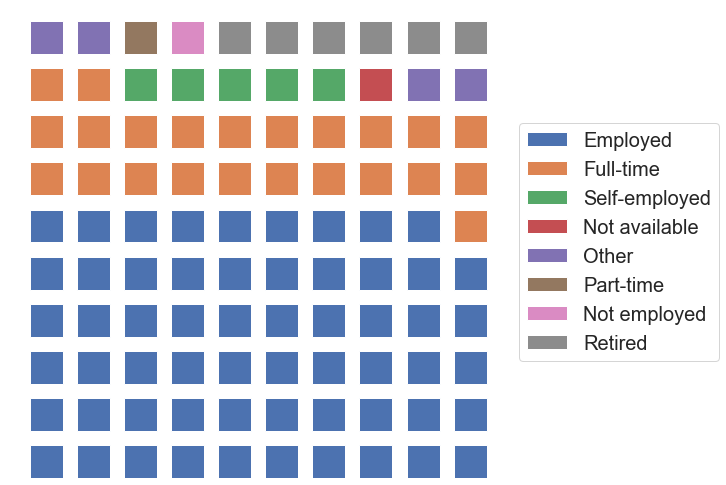

In [140]:

def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

x=np.arange(1,11)
labels=[]
for number in x:
    labels.append(str(number) + "%")

f = plt.figure(figsize=(9, 9))
gs = f.add_gridspec(2, 2)
sizes=df1['EmploymentStatus'].value_counts(normalize=True).values
labels=df1['EmploymentStatus'].value_counts(normalize=True).index
#squarify.plot(sizes=sizes, label=labels,)
waffle_counts = percentage_blocks(df1, 'EmploymentStatus')
plt.grid(False)
#plt.axis('off')
prev_count = 0
# for each category,
for status in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[status])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.7, width = 0.7, bottom = y)
    prev_count += waffle_counts[status]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6, prop={'size':20})
plt.axis('off')
plt.axis('square')
plt.ylim(0,10);


Observation: Plot is showing proportions of Employment Status as a waffle plot 10x10. Each of the square can be understood as a 1%.So for example Employed status stated 59% of borrowers and full time 23%



How are distriuted values of Borrower APR and Lender Yield?

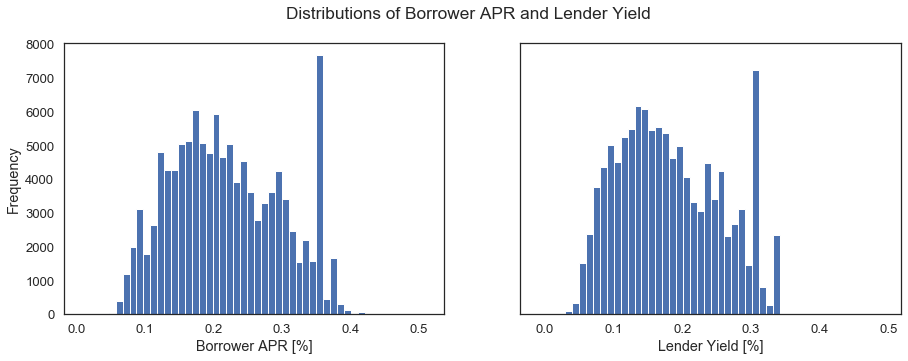

In [298]:
plt.figure(figsize=(15,5))
plt.subplot(121)
ax1=df1['BorrowerAPR'].plot(kind="hist", bins=50);
plt.xlabel('Borrower APR [%]');
plt.subplot(122, sharey=ax1)
ax2=df1['LenderYield'].plot(kind="hist", bins=50);
plt.xlabel('Lender Yield [%]');
plt.suptitle('Distributions of Borrower APR and Lender Yield');

Observation: Histograms of Borrower APR and Lender Yield are of central type and look very similar.

In [143]:
df.groupby('ProsperRating (Alpha)')['LenderYield'].mean()

ProsperRating (Alpha)
A     0.102933
AA    0.069111
B     0.144449
C     0.184427
D     0.236414
E     0.283335
HR    0.307318
Name: LenderYield, dtype: float64

A lender will earn the most on people with lower ratings.

Are Borrower APR and Lender Yield correlated?

Text(0.5, 1.0, 'Relation between Borrower APR and Lender Yield')

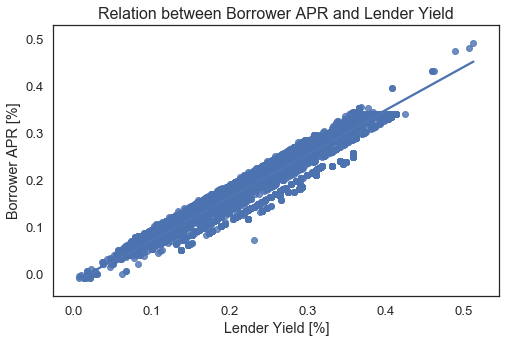

In [300]:
plt.figure(figsize=[8, 5])
sb.regplot(data = df1, x = 'BorrowerAPR', y = 'LenderYield');
plt.xlabel('Lender Yield [%]');
plt.ylabel('Borrower APR [%]');
plt.title('Relation between Borrower APR and Lender Yield', fontsize=16);

Observation: There is a strong correlation between Borrowers APR and Lender Yield. This again confirms that a lender will earn the most on people with lower ratings and therefore higher Borrower APR.

What are the distributions of Total Credit Lines and Total Trades?

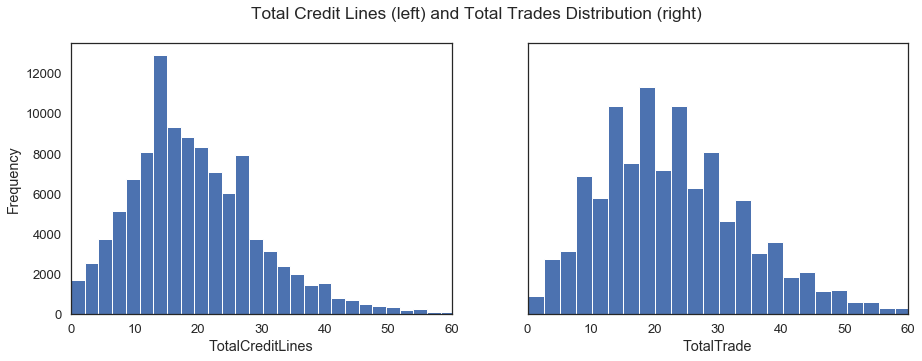

In [293]:
plt.figure(figsize=(15,5))
plt.subplot(121)
ax1=df1['TotalCreditLines'].plot(kind="hist", bins=50);
plt.xlabel('TotalCreditLines');
plt.xlim([0,60]);
plt.subplot(122, sharey=ax1)
ax2=df1['TotalTrades'].plot(kind="hist", bins=50);
plt.xlabel('TotalTrade');
plt.xlim([0,60]);
plt.suptitle('Total Credit Lines (left) and Total Trades Distribution (right)');


Observation: Both of distributions are central distibution and they look very similar.

What is the distribution for categorical variables: Term, ProsperRating and EmploymentStatus?

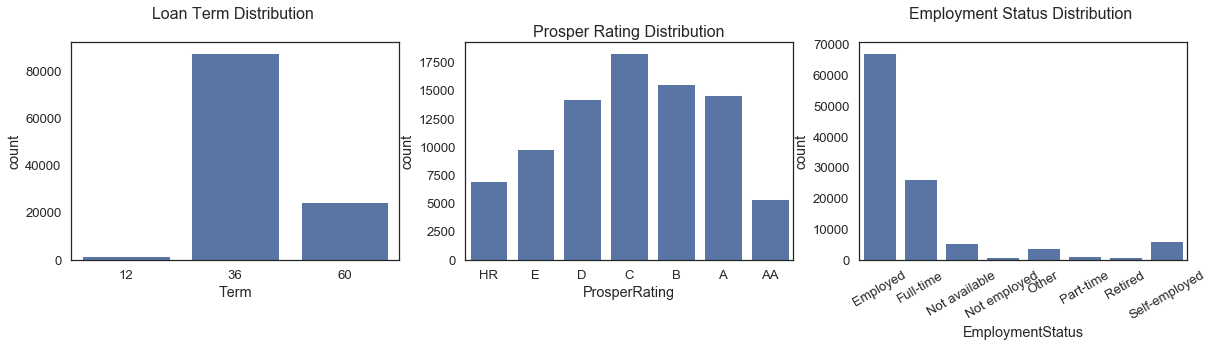

In [291]:
fig, ax = plt.subplots(ncols=3, figsize = [20,4])
sb.set(font_scale = 1.2)
sb.set_style(style='white') 
default_color = sb.color_palette()[0]
ax1=sb.countplot(data = df1, x = 'Term', color = default_color, ax = ax[0])
ax1.set_title('Loan Term Distribution \n', fontsize=16);
ax2=sb.countplot(data = df1, x = 'ProsperRating', color = default_color, ax = ax[1])
ax2.set_title('Prosper Rating Distribution', fontsize=16);
ax3=sb.countplot(data = df1, x = 'EmploymentStatus', color = default_color, ax = ax[2])
ax3.set_title('Employment Status Distribution \n', fontsize=16);

plt.xticks(rotation=30);

Observation: The length of most of the loans is 36 months. The ratings of the most of the borrowers are among D to A, while most populated is the C. The most borrowers are employed anfd full-time.

Can we distinguish Loan Original Amount by the Employment Status of borrowers?

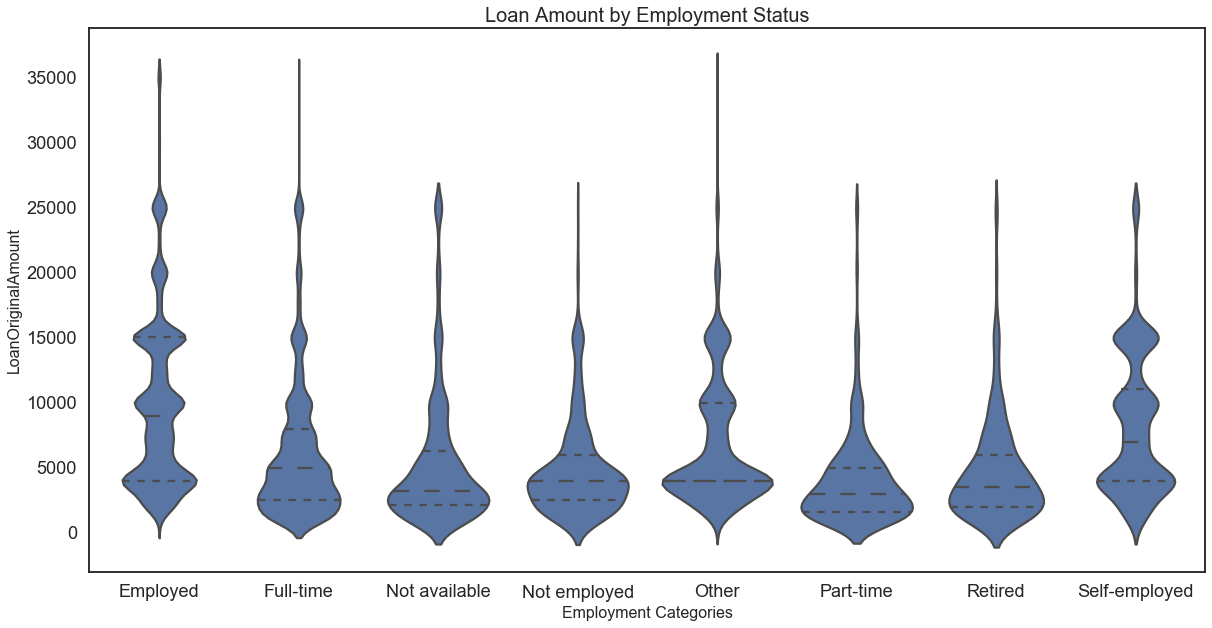

In [303]:
plt.figure(figsize = [20, 10])

sb.set_context("talk", font_scale=1.1)
base_color = sb.color_palette()[0]

ax1=sb.violinplot(data=df1, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color, inner='quartile')
ax1.set_title('Loan Amount by Employment Status', fontsize=20)
ax1.set_ylabel('LoanOriginalAmount',fontsize=16);
ax1.set_xlabel('Employment Categories', fontsize=16);
ax1.grid(False)


It seems like employment status doesn't really affect the loan amount. However, in general greater median is for employed and self-employed people.

What incomes are typical for individual employment categories?

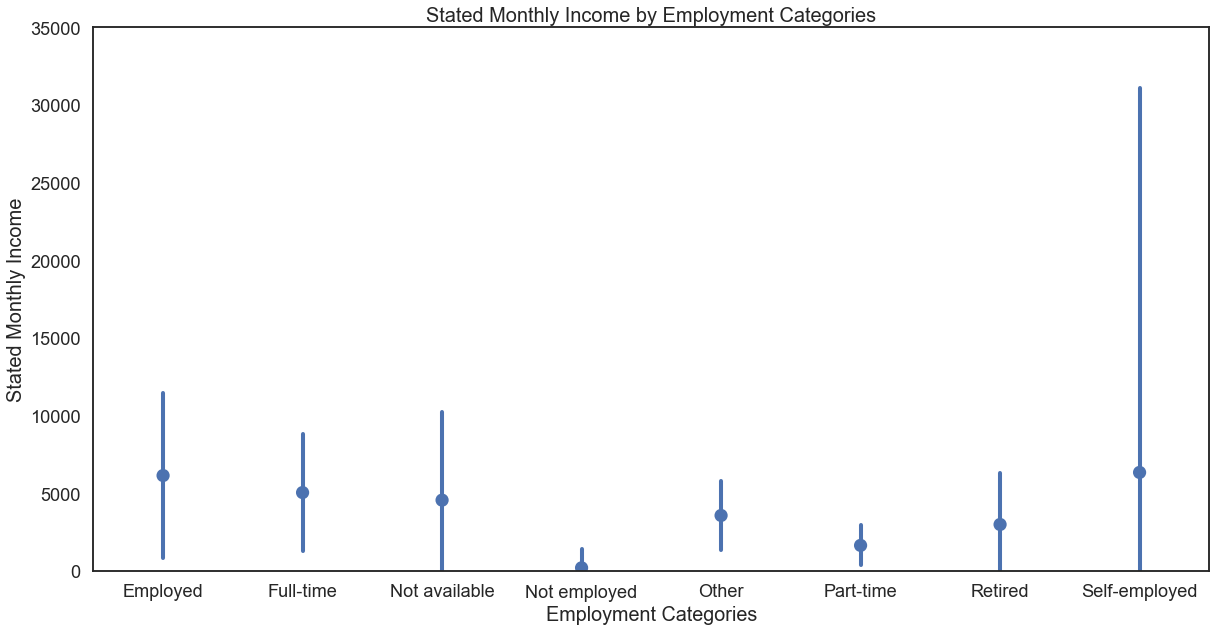

In [302]:
base_color = sb.color_palette()[1]

plt.figure(figsize = [20, 10])

sb.set_context("talk", font_scale=1.1)
base_color = sb.color_palette()[0]

ax1=sb.pointplot(data=df1, x='EmploymentStatus', y='StatedMonthlyIncome', color=base_color, ci='sd', linestyles="")

ax1.set_ylabel('Stated Monthly Income',fontsize=20)
ax1.set_xlabel('Employment Categories')
ax1.grid(False)
ax1.set_ylim([0,35000]);
ax1.set_title('Stated Monthly Income by Employment Categories', fontsize=20);



Observation: We can see that self-employed people have in general the largest incomes and not-employed and part-time workers (borrowers) have the lowest incomes.

#### Dates

**How many of the loans are closed cases?**

In [149]:
df['ListingCreationDate'].min()

'2005-11-09 20:44:28.847000000'

In [150]:
df['ListingCreationDate'].max()

'2014-03-10 12:20:53.760000000'

In [151]:
df['ClosedDate'].dropna().min()

'2005-11-25 00:00:00'

In [152]:
df['ClosedDate'].dropna().max()

'2014-03-10 00:00:00'

In [153]:
len(df['ClosedDate'].dropna())/len(df['ListingCreationDate'])

0.4835040417072593

**This means 48.35% of loan cases are closed by 10.3.2014**

**How much people have listed a loan in Prosper by years?**

In [154]:
pd.DatetimeIndex(df['ListingCreationDate']).year.value_counts(sort=True)

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: ListingCreationDate, dtype: int64

**These data shows growing business for Prosper by years**

In [267]:
data={'Year':pd.DatetimeIndex(df['ListingCreationDate']).year.value_counts(sort=False).index, 
            'ListingCreationDate': pd.DatetimeIndex(df['ListingCreationDate']).year.value_counts(sort=False).values, 
               'ClosedDate' : pd.DatetimeIndex(df['ClosedDate']).year.value_counts(sort=False).values}

In [268]:
df_sub=pd.DataFrame(data)

In [269]:
df_sub

,Year,ListingCreationDate,ClosedDate
0,2005,23,8
1,2006,6213,391
2,2007,11557,3355
3,2008,11263,5718
4,2009,2206,8197
5,2010,5530,7606
6,2011,11442,7471
7,2012,19556,7719
8,2013,35413,11873
9,2014,10734,2751


In [270]:
df_sub=pd.melt(df_sub, id_vars=['Year'], var_name='TypeDate', value_name='Counts')

In [271]:
df_sub.sample(4)

,Year,TypeDate,Counts
5,2010,ListingCreationDate,5530
14,2009,ClosedDate,8197
19,2014,ClosedDate,2751
6,2011,ListingCreationDate,11442


How many loans have been listed and how many loans were closed during the years 2005-2014?

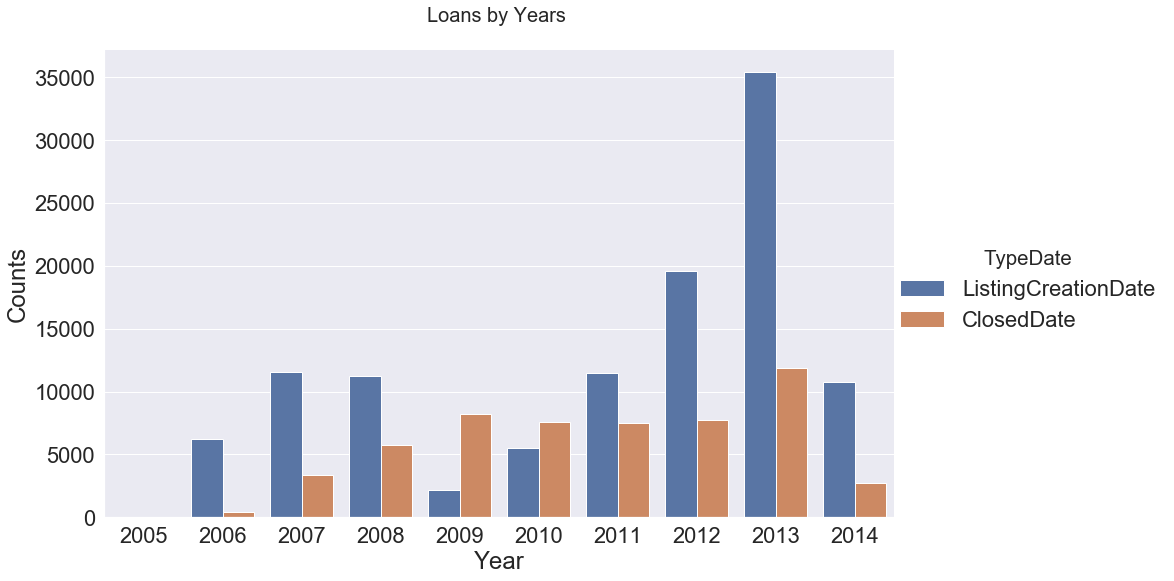

In [275]:

sb.set_context("paper", rc={"font.size":18,"axes.titlesize":18,"axes.labelsize":18})   
sb.set(font_scale = 2)

ax=sb.catplot(x='Year', y='Counts', hue='TypeDate', data=df_sub, kind='bar', height=8, aspect=10/6);
plt.title('Loans by Years \n', fontsize=20)

plt.show()


Observation: Data represents business grow in the period 9.11.2005 - 10.3.2014. In the plot above we can see  there is a  grow in the borrower counts. However, there was a stagnation in years 2009 and 2010.

#### Loan Status 

What is characteristic for Loan Status "Cancelled"

In [161]:
df.loc[df1['LoanStatus']=="Cancelled",['DateCreditPulled','EmploymentStatus','LoanOriginalAmount','ProsperPrincipalBorrowed','LoanCurrentDaysDelinquent','StatedMonthlyIncome','TotalTrades', 'AvailableBankcardCredit','ListingCategory (numeric)']]

,DateCreditPulled,EmploymentStatus,LoanOriginalAmount,ProsperPrincipalBorrowed,LoanCurrentDaysDelinquent,StatedMonthlyIncome,TotalTrades,AvailableBankcardCredit,ListingCategory (numeric)
332,2006-04-26 22:08:11.393000000,NaN,1000,NaN,0,0.000000,NaN,NaN,0
59998,2006-04-25 07:56:42,Not available,2500,NaN,0,4166.666667,NaN,NaN,0
72480,2006-02-16 11:41:07.423000000,NaN,3000,NaN,0,3833.333333,NaN,NaN,0
97281,2006-05-05 03:00:35.130000000,NaN,1000,NaN,0,2600.000000,NaN,NaN,0
112975,2008-09-29 10:18:23.650000000,Full-time,1000,NaN,0,2444.666667,15.0,11500.0,1


**We can see that all 5 for which was the loan cancelled, are not deliquent any days and has the amount was <= $3000 and for 4/5 it was the first loan ever.**

**For how many borrowers is this a first loan in
Prosper?**

In [162]:
df['ProsperPrincipalBorrowed'].isnull().sum()

91852

In [163]:
100*df['ProsperPrincipalBorrowed'].isnull().sum()/len(df)

80.61648103776649

**For 80.6% borrowers it is the first loan in Prosper**

**How much of the borrowers have verified incomes?**

In [164]:
df['IncomeVerifiable'].value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

In [165]:
8669/(105268+8669)

0.07608590712411245

**Only 7.6% haven't verified their income.**

**What is their Employment status?**

In [170]:
df.loc[df['IncomeVerifiable']==False, ['EmploymentStatus']].mode()

,EmploymentStatus
0,Self-employed


**These borrowers which haven't verified incomes are mostly self-employed.**

#### Borrower APR by Prosper Rating

In [171]:
df_sub=df1.groupby('ProsperRating (numeric)')['BorrowerAPR'].mean()

df_sub=df_sub.reset_index()

In [172]:
df_sub.loc[df_sub['ProsperRating (numeric)']==1.0, 'ProsperRating (numeric)'] ='HR'
df_sub.loc[df_sub['ProsperRating (numeric)']==2.0, 'ProsperRating (numeric)'] ='E'
df_sub.loc[df_sub['ProsperRating (numeric)']==3.0, 'ProsperRating (numeric)'] ='D'
df_sub.loc[df_sub['ProsperRating (numeric)']==4.0, 'ProsperRating (numeric)'] ='C'
df_sub.loc[df_sub['ProsperRating (numeric)']==5.0, 'ProsperRating (numeric)'] ='B'
df_sub.loc[df_sub['ProsperRating (numeric)']==6.0, 'ProsperRating (numeric)'] ='A'
df_sub.loc[df_sub['ProsperRating (numeric)']==7.0, 'ProsperRating (numeric)'] ='AA'


df_sub.rename(columns={'ProsperRating (numeric)':'ProsperRating'},inplace=True)

In [173]:
df_sub

,ProsperRating,BorrowerAPR
0,HR,0.356061
1,E,0.330551
2,D,0.280581
3,C,0.226124
4,B,0.184030
5,A,0.138909
6,AA,0.090041


Are Borrower APR and Prosper Rating correlated?

<Figure size 1440x864 with 0 Axes>

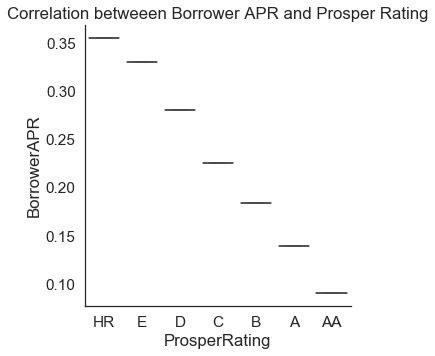

In [265]:
base_color = sb.color_palette()[0]
sb.set_style(style='white') ;

plt.figure(figsize=[20,12]);
ax=sb.catplot(x='ProsperRating', y='BorrowerAPR', data=df_sub, kind="box", color=base_color);
plt.title('Correlation betweeen Borrower APR and Prosper Rating');

Observation: Borrowers with higher Prosper Rating have lower APR. There is a strong correlation between Borrowers APR and Prosper Rating.

In [176]:
df.groupby('ProsperRating (Alpha)')['MonthlyLoanPayment'].mean()

ProsperRating (Alpha)
A     342.078349
AA    347.378591
B     345.724546
C     328.411027
D     255.403380
E     187.132863
HR    149.598975
Name: MonthlyLoanPayment, dtype: float64

In [177]:
df.groupby('ProsperRating (Alpha)')['LoanOriginalAmount'].mean()

ProsperRating (Alpha)
A     11459.886468
AA    11583.539092
B     11622.354919
C     10391.940420
D      7083.439190
E      4586.404696
HR     3463.113771
Name: LoanOriginalAmount, dtype: float64


**Average loan original amount  and monthly loan payment is higher for a borrower with higher prosper rating.**

In [178]:
df1_loan1=df1[df1['LoanOriginalAmount']<10000]
df1_loan2=df1[(df1['LoanOriginalAmount']>10000) & (df1['LoanOriginalAmount']<20000)]
df1_loan3=df1[(df1['LoanOriginalAmount']>20000) & (df1['LoanOriginalAmount']<30000)]
df1_loan4=df1[(df1['LoanOriginalAmount']>30000) ]


I created 4 loan groups based on ther LoanOriginalAmount called df1_loan1, df1_loan2, df1_loan3,df1_loan4.  LoanOriginalAmount limits are 10000 for df1_loan1, 20000 for df1_loan2, 30000 df1_loan3 and higher than 30000 is represented in df1_loan4 groups.

In [179]:
df1_loan1['LoanStatus'].value_counts(sort=True, normalize=True)

Completed                 0.423247
Current                   0.369151
Chargedoff                0.132449
Defaulted                 0.055321
Past Due (1-15 days)      0.006889
Past Due (31-60 days)     0.003076
Past Due (61-90 days)     0.002867
Past Due (91-120 days)    0.002700
Past Due (16-30 days)     0.002227
FinalPaymentInProgress    0.001879
Past Due (>120 days)      0.000125
Cancelled                 0.000070
Name: LoanStatus, dtype: float64

**I create the new sub dataframe  df1_sub2 where the loan length is included.**

In [180]:
df1_sub2=df1.copy()
df1_sub2['DateDiff']=df1_sub2['ClosedDate']-df1_sub2['LoanOriginationDate']


def strfdelta(tdelta, fmt):
    d = {"days": tdelta.days}
    d["hours"], rem = divmod(tdelta.seconds, 3600)
    d["minutes"], d["seconds"] = divmod(rem, 60)
    return fmt.format(**d)

Source for function "strfdelta": https://stackoverflow.com/questions/8906926/formatting-timedelta-objects

In [181]:
DateDiff_int=[]
for item in df1_sub2.DateDiff:
    DateDiff_int.append(strfdelta(item, "{days}"))
df1_sub2['DaysLoan']=DateDiff_int    

In [182]:
df1_sub2.drop(df1_sub2[df1_sub2['DaysLoan']=="nan"].index, axis=0, inplace=True)
df1_sub2['DaysLoan']=df1_sub2['DaysLoan'].astype(np.int64)
df1_sub2.drop(df1_sub2[df1_sub2['DaysLoan']<0].index, axis=0, inplace=True)
df1_sub2['StatedMonthlyIncome'].fillna(df1_sub2['StatedMonthlyIncome'].mean(), inplace=True)
df1_sub2['LoanOriginalAmount'].fillna(df1_sub2['LoanOriginalAmount'].mean(), inplace=True)

In [183]:
df1_sub2.head(3)

,ListingKey,LoanOriginationDate,ClosedDate,LoanStatus,LoanOriginalAmount,Term,MonthlyLoanPayment,BorrowerAPR,LenderYield,CreditGrade,...,PublicRecordsLast10Years,EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,AvailableBankcardCredit,TotalTrades,AmountDelinquent,TotalCreditLines,DateDiff,DaysLoan
0,1021339766868145413AB3B,2007-09-12,2009-08-14,Completed,9425,36,330.43,0.16516,0.1380,C,...,0.0,Self-employed,2.0,3083.333333,1500.0,11.0,472.0,9.0,702 days,702
2,0EE9337825851032864889A,2007-01-17,2009-12-17,Completed,3001,36,123.32,0.28269,0.2400,HR,...,0.0,Not available,NaN,2083.333333,NaN,NaN,NaN,NaN,1065 days,1065
11,0F1734025150298088A5F2B,2007-10-18,2008-01-07,Completed,1000,36,33.81,0.15033,0.1225,C,...,0.0,Full-time,19.0,1666.666667,2580.0,7.0,2224.0,4.0,81 days,81


Dataframe only with most frequent occurencies in LoanStatus

In [185]:
cat_var1=['Current', 'Completed', 'Chargedoff','Defaulted']
df1_sub=df1[df1['LoanStatus'].isin(cat_var1)]

## 2.

## What factors affect a loan’s outcome status?

What is the percentage of each category in Loan Status?

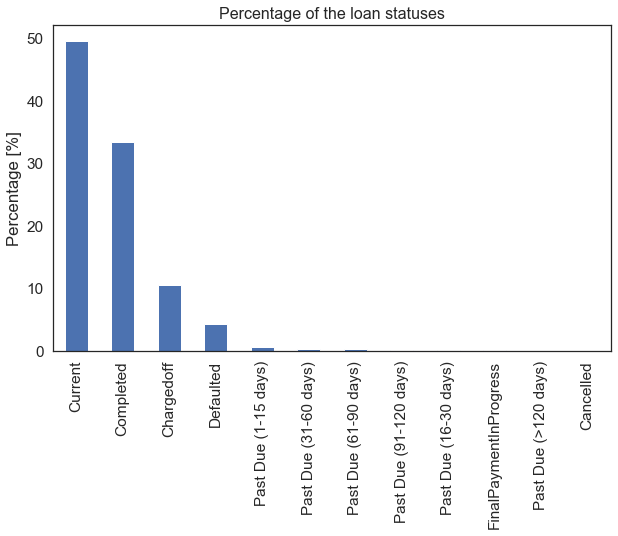

In [262]:
plt.figure(figsize=[10,6]);
xx=df1['LoanStatus'].value_counts(normalize=True)*100
xx.plot(kind="bar");
plt.ylabel('Percentage [%]');
plt.grid(False);
plt.title('Percentage of the loan statuses', fontsize=16);

Observation: The visible proportion has the categories Current, Completed, Chargedoff and Defaulted.

What number of LoanCurrentDaysDelinquent is characteristic for each of the loan status?

In [187]:
df.groupby('LoanStatus')['LoanCurrentDaysDelinquent'].mean()

LoanStatus
Cancelled                    0.000000
Chargedoff                1255.960557
Completed                    0.000000
Current                      0.000000
Defaulted                  451.098047
FinalPaymentInProgress       0.000000
Past Due (1-15 days)         7.795285
Past Due (16-30 days)       22.128302
Past Due (31-60 days)       45.517906
Past Due (61-90 days)       75.654952
Past Due (91-120 days)     105.509868
Past Due (>120 days)       121.500000
Name: LoanCurrentDaysDelinquent, dtype: float64

Table 1: We can see on the above table, that charged-off borrowers have in average more than 1000 deliquencies on
the current loan and defaulted borrowers 451. Other populated groups like Current and Completed have LoanCurrentDaysDelinquent 0.

What are the most frequent Prosper Ratings for the most common Loan Status?

In [189]:
df1_sub.groupby('LoanStatus')['ProsperRating'].value_counts()

LoanStatus  ProsperRating
Chargedoff  D                 1395
            HR                1215
            E                 1131
            C                  706
            B                  500
            A                  326
            AA                  63
Completed   D                 4192
            A                 3203
            C                 2977
            B                 2785
            E                 2506
            HR                2301
            AA                1700
Current     C                14001
            B                11891
            A                10755
            D                 7920
            E                 5558
            AA                3551
            HR                2900
Defaulted   D                  282
            HR                 209
            E                  193
            C                  134
            B                   88
            A                   79
            AA               

What are the counts of prosper ratings in most frequent loan status categories?

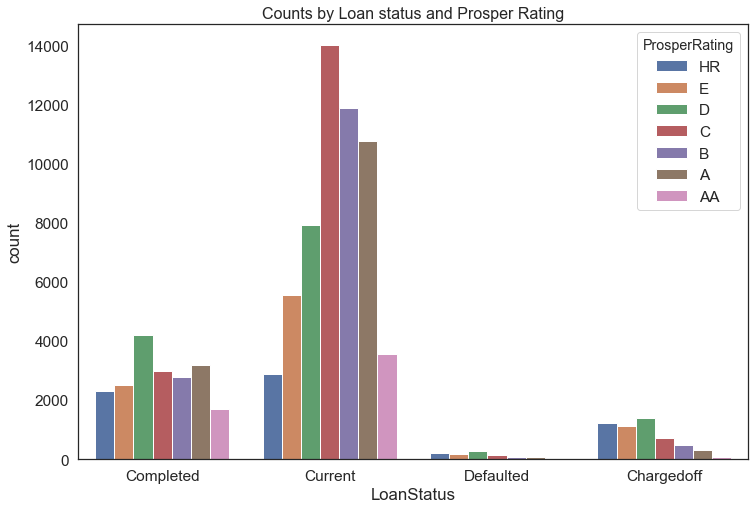

In [260]:
plt.figure(figsize = [12, 8])
sb.set(font_scale = 1.4)
sb.set_style(style='white') 
ax=sb.countplot(x="LoanStatus",hue='ProsperRating', data=df1_sub);
ax.set_title('Counts by Loan status and Prosper Rating', fontsize=16);

Observation: We can see that in the group with Current LoanStatus, the most frequent is the C ProsperRating. For the Completed, Defaulted and Chargedoff it is D ProsperRating. 

What are mean Amount Delinquents for each loan status prosper ratings?

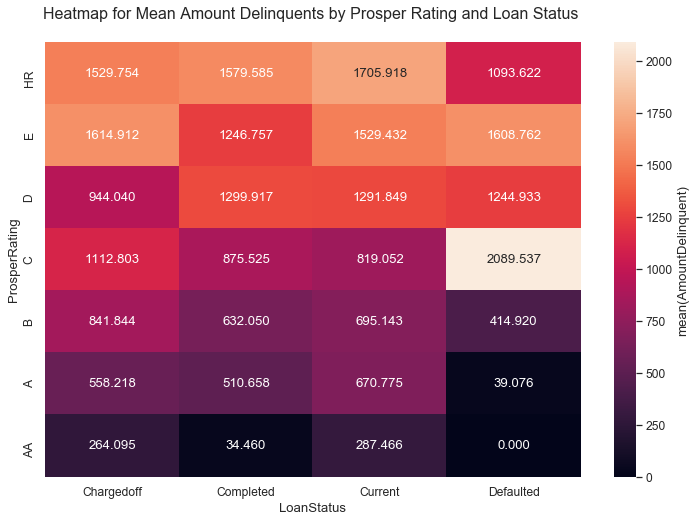

In [258]:
plt.figure(figsize = [12, 8])

cat_means = df1_sub.groupby(['LoanStatus', 'ProsperRating']).mean()['AmountDelinquent']
cat_means = cat_means.reset_index(name = 'AmountDelinquent')

cat_means = cat_means.pivot(index = 'ProsperRating', columns = 'LoanStatus',
                            values = 'AmountDelinquent')
ax=sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(AmountDelinquent)'});
ax.set_title('Heatmap for Mean Amount Delinquents by Prosper Rating and Loan Status \n', fontsize=16);

Observation:From the above heatmap, we can see, that the group with the highest mean AmountDelinquent is the group with Prosper Rating C and Loan Status Defaulted. Groups with higher rating (AA, A) have the lovest mean Amount Delinquent. Borrowers whose loans are charged-off have the highest mean Amount Delinquent compare to borrowers with the other loan status. 

What is the mean Loan Original Amount for each of the prosper ratings in loan status category?

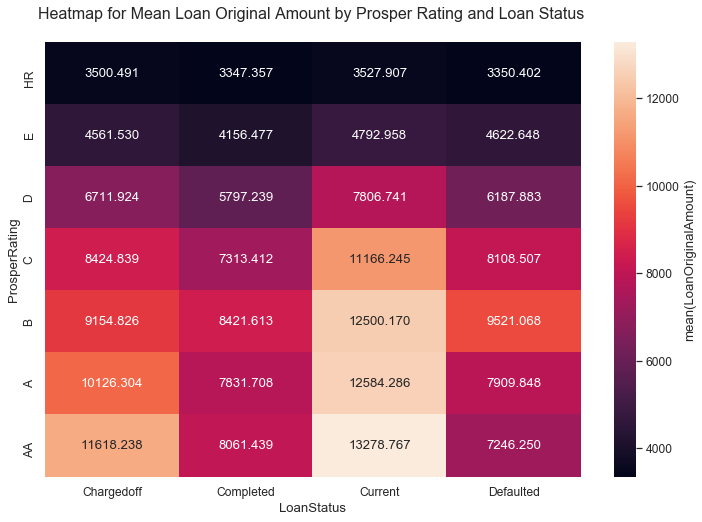

In [257]:
plt.figure(figsize = [12, 8])

cat_means = df1_sub.groupby(['LoanStatus', 'ProsperRating']).mean()['LoanOriginalAmount']
cat_means = cat_means.reset_index(name = 'LoanOriginalAmount')

cat_means = cat_means.pivot(index = 'ProsperRating', columns = 'LoanStatus',
                            values = 'LoanOriginalAmount')
ax=sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(LoanOriginalAmount)'});
ax.set_title('Heatmap for Mean Loan Original Amount by Prosper Rating and Loan Status \n', fontsize=16);

Observation:From the about heatmap we cans that highest mean Loan Original Amounts have the borrowers with the loan status Current and with highest ratings (AA, A, B). The second group with the highest mean Loan Original Amount is the "charged-off" group.

What is the mean Stated Monthly Income for each of the prosper ratings in loan status category?

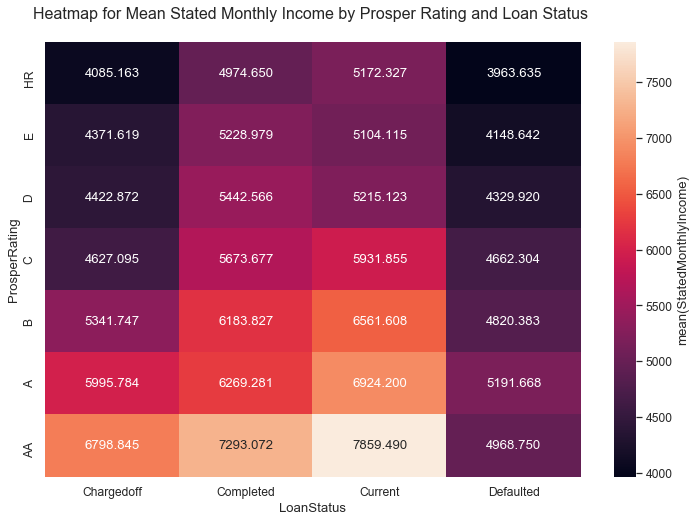

In [256]:
plt.figure(figsize = [12, 8])

cat_means = df1_sub.groupby(['LoanStatus', 'ProsperRating']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome')

cat_means = cat_means.pivot(index = 'ProsperRating', columns = 'LoanStatus',
                            values = 'StatedMonthlyIncome')
ax=sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
ax.set_title('Heatmap for Mean Stated Monthly Income by Prosper Rating and Loan Status \n', fontsize=16);

Observation: We can see that borrowers with the highest incomes belong to the LoanStatus groups Current and then Completed. Status Defaulted have borrowers with the lowest incomes.

What is characteristic for Chargedoff Loan Status in terms of TotalTrades, PublicRecordLast10Years and LoanOriginalAmount?

In [194]:
df1[(df1['TotalTrades']>0) & (df1['LoanStatus']=="Chargedoff")].count()[0]/len(df1[df1['LoanStatus']=="Chargedoff"])

0.8880920613742495

In [195]:
df1[(df1['PublicRecordsLast10Years']>0) & (df1['LoanStatus']=="Chargedoff")].count()[0]/len(df1[df1['LoanStatus']=="Chargedoff"])

0.3028685790527018

In [196]:
df[(df['LoanOriginalAmount']>4000) & (df1['LoanStatus']=="Chargedoff")].count()[0]/len(df[df1['LoanStatus']=="Chargedoff"])

0.5080887258172114

 88.8% of those who were chargedoff have not null number of Total Trades, 30.3% of them have a Public Record in the last 10 years and 50.8% Loan Original Amount >= 4000.

## What affects the borrower’s APR or interest rate? 


In [251]:
##Suggested Variables
num_vars = ['TotalTrades', 'BorrowerAPR', 'StatedMonthlyIncome', 'AvailableBankcardCredit','LoanOriginalAmount','DelinquenciesLast7Years','PublicRecordsLast10Years']
cat_vars = ['Term', 'ProsperRating', 'EmploymentStatus','IsBorrowerHomeowner']

Which variables correlated most with Borrower APR?

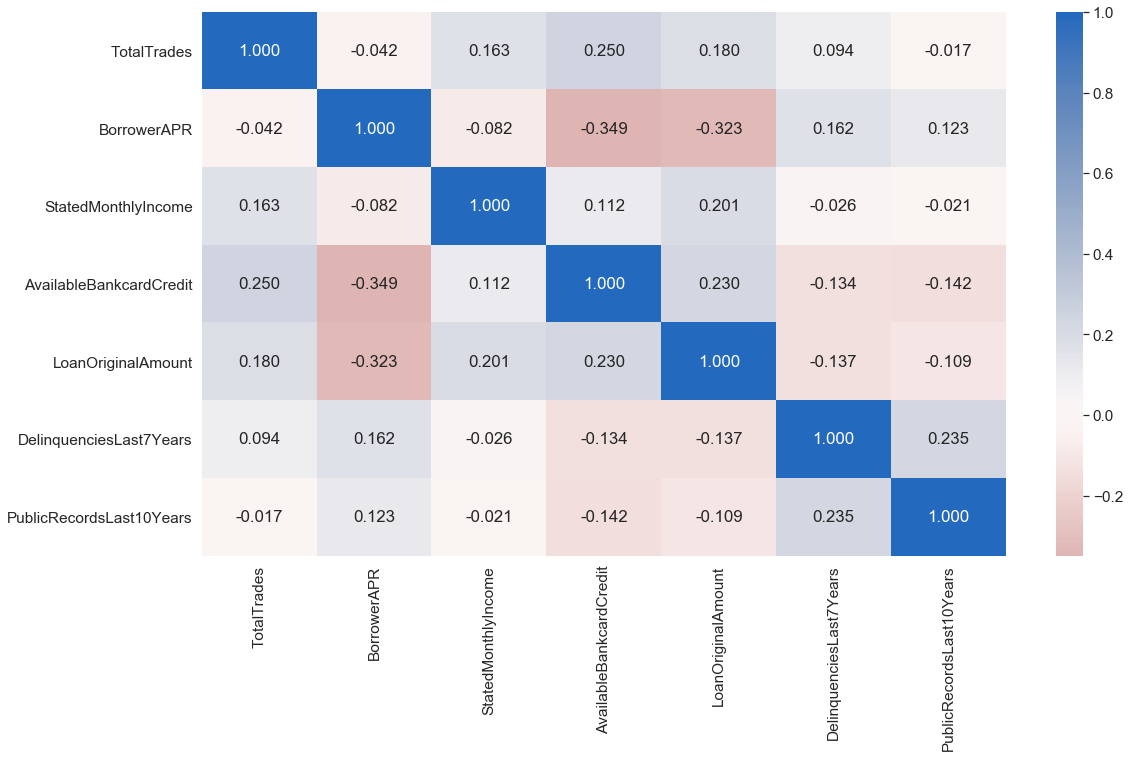

In [252]:
# correlation plot

sb.set(font_scale=1.4)
plt.figure(figsize = [18, 10])
sb.heatmap(df1[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

In [254]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'AvailableBankcardCredit']


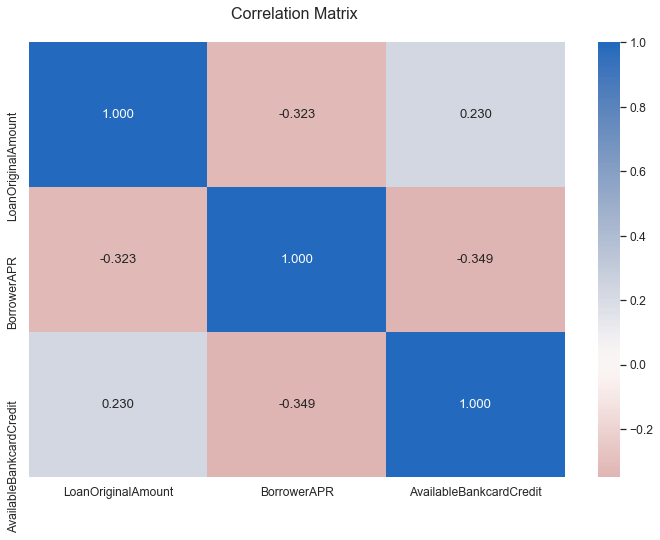

In [255]:
# correlation matrix
plt.figure(figsize = [12, 8])
sb.set(font_scale=1.1)
ax=sb.heatmap(df1[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
ax.set_title('Correlation Matrix \n', fontsize=16);

Observation: We can see that there is a weak negative correlation between BorrowerAPR and LoanOriginalAmount and AvailableBankCredit. Other variables in df1 have  even lower correlations coefficients with Borrower APR. 

Show the correlation matrix as scatter plots: How do look correlations plots between the Borrower APR and the variables with the highest correlation coefficient to the Borrower APR from the above correlation matrix? 

<Figure size 432x288 with 0 Axes>

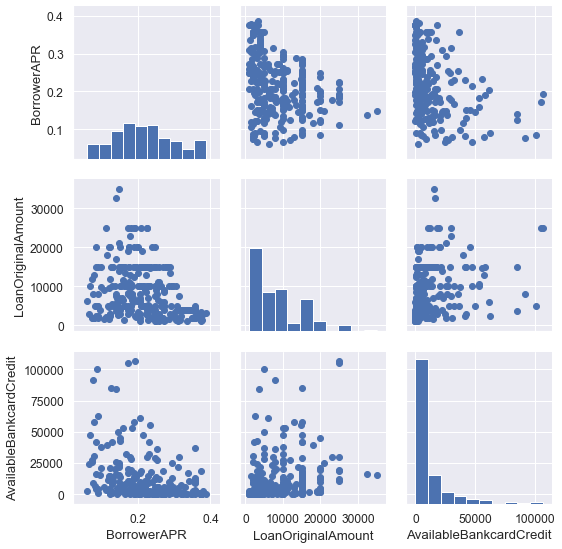

In [246]:
# plot matrix: sample 5000 loans so that plots are clearer and render faster

plt.figure(figsize = [6,4])
sb.set(font_scale=1.1)

num_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'AvailableBankcardCredit']

samples = np.random.choice(df1.shape[0], 300, replace = False)
loan_samp = df1.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = num_vars);
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);
#g.fig.suptitle('PairPlot for variables Borrower APR, Loan Original Amount \n  and Available Bankcard Credit \n \n \n', fontsize=12);


Observation: We could recognize  weak patterns for correlations.Correlation between BorrowerAPR and LoanOriginalAmount is -0.302 - which indicates a weak negative correlation.This means that there are also other factors which determine the value of BorrowerAPR.

We can also see positive weak correlation between LoanOriginalAmount and AvailableBankcardCredit (correlation coeff. 0.230).

Comparing histograms of BorrowerAPR with other variables, we can see while distribution of BorrowerAPR is wide and central (closed to normal), other distributions are very right-skewed.

How are distributed variables StatedMonthlyIncome, AvailableBankcardCredit, LoanOriginalAmount? (closer look)

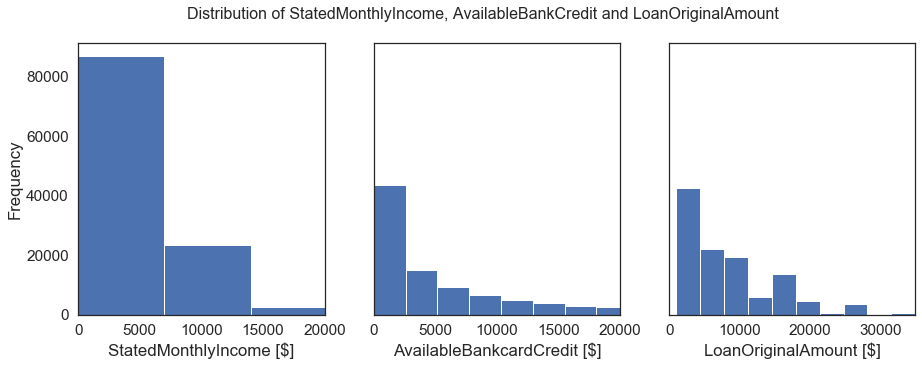

In [236]:
plt.figure(figsize=(15,5))
plt.subplot(131)
ax1=df1['StatedMonthlyIncome'].plot(kind="hist", bins=250);
plt.xlim([0,20000])
plt.xlabel('StatedMonthlyIncome [$]');
plt.subplot(132, sharey=ax1)
plt.suptitle('Distribution of StatedMonthlyIncome, AvailableBankCredit and LoanOriginalAmount', fontsize=16)
ax2=df1['AvailableBankcardCredit'].plot(kind="hist", bins=250);
plt.xlim([0,20000])
plt.xlabel('AvailableBankcardCredit [$]');
plt.subplot(133, sharey=ax1)
df1['LoanOriginalAmount'].plot(kind="hist", bins=10);
plt.xlim([0,35000])
plt.xlabel('LoanOriginalAmount [$]');

Observation: All three distributions are right-skewed. 
We can see the most frequent Stated Monthly Income is less than \\$5000, Available Bank Credit is less than \\$2500
and Loan Original Amount less than \\$5000.

What are the typical values for LoanOriginalAmount?

In [203]:
df1['LoanOriginalAmount'].value_counts(sort=True)[0:12]

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
3000      5749
25000     3630
20000     3291
1000      3206
2500      2992
7500      2975
7000      2949
Name: LoanOriginalAmount, dtype: int64

Since variables BorrowerAPR and LenderYield have very similar distributions, what is the correlation coefficient between these 2 numerical variables?

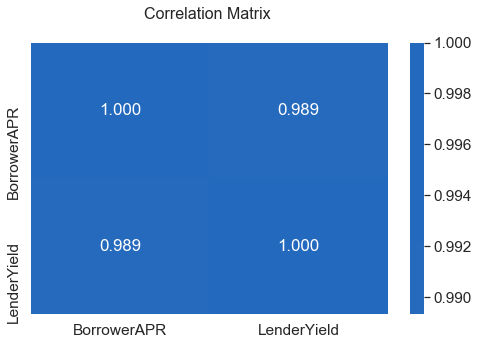

In [235]:
ax.set_title('Correlation Matrix \n', fontsize=16);
num_vars = ['BorrowerAPR', 'LenderYield']
# correlation plot
plt.figure(figsize = [8, 5])
ax=sb.heatmap(df1[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
ax.set_title('Correlation Matrix \n', fontsize=16);

Observation: There is a strong correlation between Borrowers APR and Lender Yield. This  confirms that a lender will earn the most on people with lower higher Borrower APR.

Can you show correlation plots of Borrower APR - Lender Yield and Borrower APR - Prosper Rating? Numerical variables are Borrower APR and Lender Yield, while Prosper Rating is a categorical Ordinal variable. 

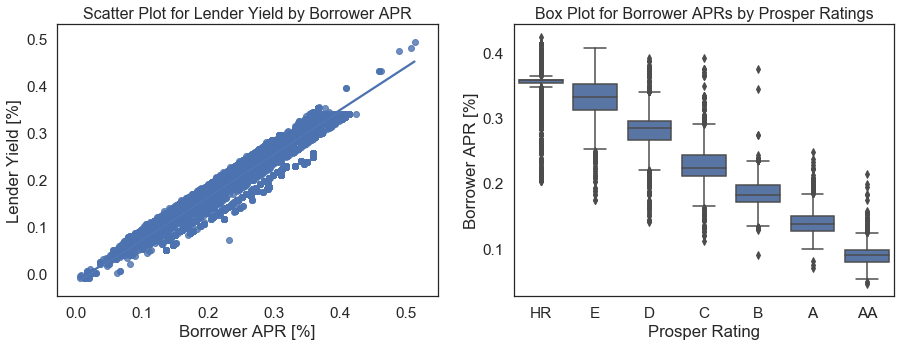

In [232]:
sb.set_style(style='white') 
base_color = sb.color_palette()[0]

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
ax=sb.regplot(ax=axes[0], data = df1, x = 'BorrowerAPR', y = 'LenderYield');
ax1=sb.boxplot(ax=axes[1], x='ProsperRating', y='BorrowerAPR', data=df1, color=base_color);
ax.set(xlabel='Borrower APR [%]', ylabel='Lender Yield [%]');
ax1.set(xlabel='Prosper Rating', ylabel='Borrower APR [%]');
ax.set_title('Scatter Plot for Lender Yield by Borrower APR', fontsize=16);
ax1.set_title('Box Plot for Borrower APRs by Prosper Ratings', fontsize=16);

In [206]:
df.groupby('ProsperRating (Alpha)')['LenderYield'].mean()

ProsperRating (Alpha)
A     0.102933
AA    0.069111
B     0.144449
C     0.184427
D     0.236414
E     0.283335
HR    0.307318
Name: LenderYield, dtype: float64

Observation: Borrowers with higher Prosper Rating have lower APR. There is a strong correlation between Borrowers APR and Prosper Rating score. There is also a strong correlation between borrower APR and LenderYield. That indicates that lender will earn the most on people with lower ratings.

Are there some differencies in Borrower's APR by Prosper Rating and Loan Term?

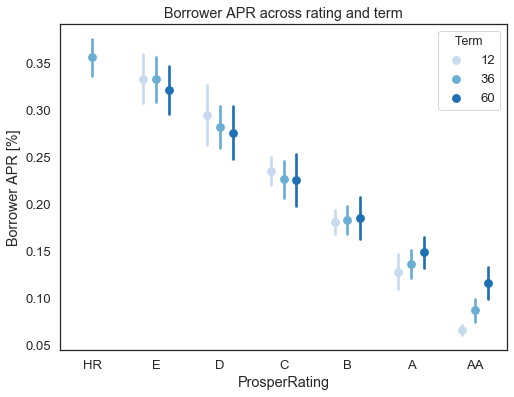

In [207]:
sb.set_style(style='white') 
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df1, x = 'ProsperRating', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Borrower APR [%]')
ax.set_yticklabels([],minor = True);

Observation: The borrower APR decrease with the increase of borrow term for people with HR-C ratings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

## Are there differences between loans depending on how large the original loan amount was?

I created 4 loan groups based on ther LoanOriginalAmount called df1_loan1, df1_loan2, df1_loan3,df1_loan4.  

LoanOriginalAmount limits are 10000 for df1_loan1, 20000 for df1_loan2, 30000 df1_loan3 and higher than 30000 is represented in df1_loan4 groups.


How do borrowers with different Loan Original Amount differ in terms of the Loan Duration?

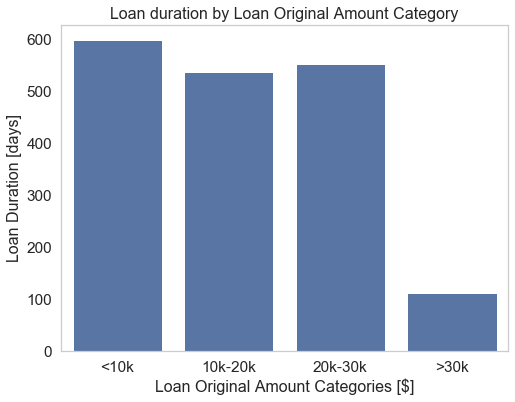

In [229]:
plt.figure(figsize=(8,6))
sb.set(font_scale = 1.4)
sb.set_style("whitegrid")
y=[strfdelta((df1_loan1['ClosedDate']-df1_loan1['LoanOriginationDate']).mean(),"{days}"),strfdelta((df1_loan2['ClosedDate']-df1_loan2['LoanOriginationDate']).mean(),"{days}"), strfdelta((df1_loan3['ClosedDate']-df1_loan3['LoanOriginationDate']).mean(),"{days}"),strfdelta((df1_loan4['ClosedDate']-df1_loan4['LoanOriginationDate']).mean(),"{days}")]
x=["<10k","10k-20k","20k-30k", ">30k"]
ax=sb.barplot(x,y, color=base_color);
ax.set_title('Loan duration by Loan Original Amount Category', fontsize=16)
ax.set_xlabel('Loan Original Amount Categories [$]',fontsize=16);
ax.set_ylabel('Loan Duration [days]',fontsize=16);
ax.grid(False)

Observation: Above plot shows that the borrowers with the highest LoanOriginalAmount have the shortest period between LoanOriginationDate and ClosedDate.

What are Loan Original Amounts by the Loan Length and discerned by Loan Status?

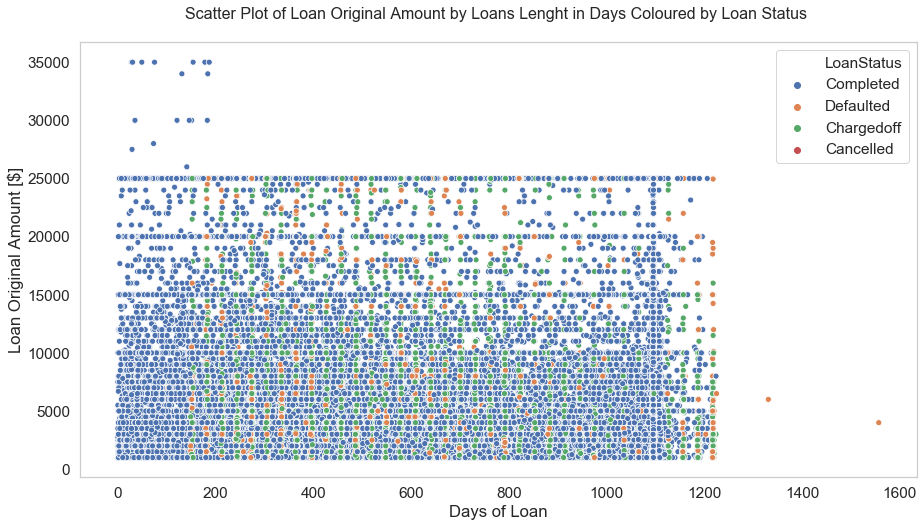

In [224]:
plt.figure(figsize=[15, 8])
sb.set(font_scale = 1.4)
sb.set_style("whitegrid")
ax=sb.scatterplot(data = df1_sub2, x = 'DaysLoan', y = 'LoanOriginalAmount', hue="LoanStatus");
ax.set_xlabel('Days of Loan');
ax.set_ylabel('Loan Original Amount [$]');
ax.set_title('Scatter Plot of Loan Original Amount by Loans Lenght in Days Coloured by Loan Status \n', fontsize=16)
ax.grid(False)

Observation: Here we present only Completed loans with defined DateClosed. Plot above shows that the highest LoanOriginalAmounts (>\$25000) are completed within ca. 200 days. The longest loans are for the group Defaulted. For loans shorter than 1 year, the most frequent loan status is Completed.

What kind of loan statuses are present in the subgroup with Loan Original Amount higher than $ 30000 ?

In [210]:
df1_loan4['LoanStatus'].value_counts(sort=True, normalize=True)

Current                   0.970179
Completed                 0.017893
Past Due (31-60 days)     0.007952
Past Due (1-15 days)      0.001988
FinalPaymentInProgress    0.001988
Name: LoanStatus, dtype: float64

In the table above we can see the group df4_loan, where the LoanOriginalAmounts are higher than 35000. In this group are represented only Current and Completed loan status. 

How are Monthly Loan Payments discerned by Loan Term dependend on Loan Original Amount?

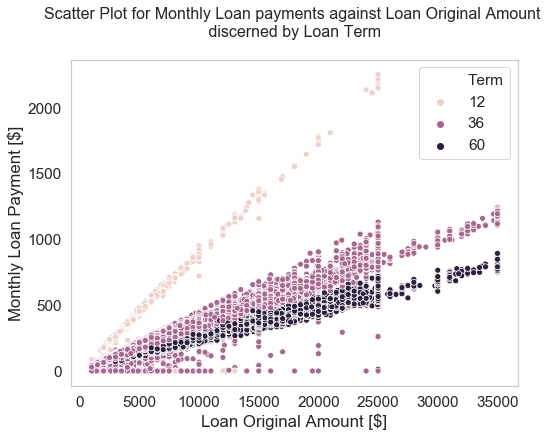

In [226]:
plt.figure(figsize=[8, 6])
sb.set(font_scale = 1.4)
sb.set_style("whitegrid")
ax=sb.scatterplot(x="LoanOriginalAmount", y='MonthlyLoanPayment', data=df1, hue='Term', legend="full");
ax.grid(False)
ax.set_ylabel('Monthly Loan Payment [$]')
ax.set_xlabel('Loan Original Amount [$]');
ax.set_title('Scatter Plot for Monthly Loan payments against Loan Original Amount \n discerned by Loan Term \n', fontsize=16);

Observation: As supposed, loans with the shortest term has the higher monthly payments, if the loan original amount is the same. We can see that for LoanOriginalAmount >\\$30000 there are only 36 and 60 months terms, but from the previous plot and tables below we can see that borrowers in this group pay their dues within 200 days. 

In [212]:
(df1_loan4['ClosedDate']-df1_loan4['LoanOriginationDate']).mean()

Timedelta('112 days 21:20:00')

In [213]:
(df1_loan4['ClosedDate']-df1_loan4['LoanOriginationDate']).mode()

0    28 days
1    30 days
2    49 days
3    75 days
4   131 days
5   154 days
6   178 days
7   184 days
8   187 days
dtype: timedelta64[ns]

What subgroups of the Loan Original Amount vs. Stated Monthly Income are the most populated?

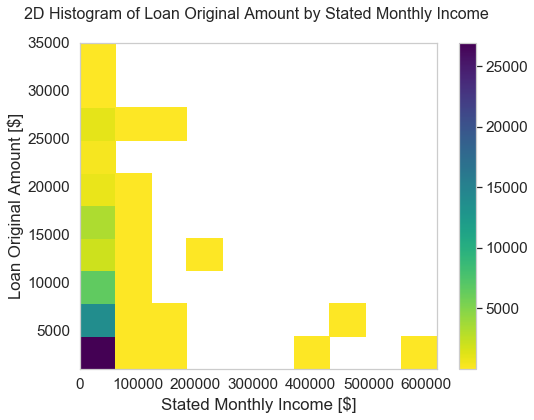

In [223]:
plt.figure(figsize=[8, 6])
sb.set(font_scale = 1.4)
sb.set_style("whitegrid")
plt.hist2d(data = df1_sub2, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Stated Monthly Income [$]')
plt.ylabel('Loan Original Amount [$]');
plt.title('2D Histogram of Loan Original Amount by Stated Monthly Income \n', fontsize=16);

 Observation: In this plot we can see that most of borrowers have salaries in range  \\$0-50000   and LoanOriginalAmount is less than  $5000.

<a id="main"></a>
## Main findings

#### What factors affect a loan’s outcome status?


<ol>
    <li>The most populated categeries of loan status are Current, Completed, Chargedoff and Defaulted.</li>
    <li>For the group with Current loan status, the most frequent is the C prosper rating. For the Completed, Defaulted and Chargedoff it is D prosper rating. </li>
    <li>The group with the highest mean amount delinquent is the group with prosper rating C and loan status Defaulted. Groups with higher rating (AA, A) have the lowest mean amount delinquent. </li>
    <li>Highest mean loan original amounts have the borrowers with the loan status Current and with highest ratings (AA, A, B). The second group with the highest mean loan original amount is the "charged-off" group.</li>
<li> Borrowers with the highest incomes belong to the loan status Current. Loan status Defaulted have borrowers with the lowest incomes.</li>
     <li>There are only 5 borrowers with cancelled loans. These borrowers haven't been deliquent any day and has the loan original amount less than or equal \$3000 and for 4/5 it was the first loan ever.</li>
   <li> 88.8% of those who were chargedoff have not null number of total trades, 30.3% of them have a public record in the last 10 years and 50.8% loan original amount >= 4000.</li>
</ol>

#### What affects the borrower’s APR or interest rate? 

<ol>
    <li>BorrowerAPR is strongly negatively correlated with ProsperRating and positevely correlated with lender yield. It means that borrowers with the lowest rating have the highest interest rate (APR) and the lender have higher interest on lowest rated borrowers.</li>
    <li>Correlation between Borrower APR and loan original amount is -0.302 - which indicates a weak negative correlation.This means that there are also other factors which determine the value of BorrowerAPR.</li>
    <li>Correlation between Borrower APR and AvailableBankCredit is 0.230 - which indicates a weak positive correlation.This means that there are also other factors which determine the value of BorrowerAPR.</li>
    <li>The borrower APR decrease with the increase of borrow term for people with HR-C ratings. But for people with B-AA ratings, the APR increase with the increase of borrow term.</li>
</ol>    

#### Are there differences between loans depending on how large the original loan amount was?

<ol>
    <li> The highest loan original amounts (>$25000) are paid by borrowers within ca. 200 days. According to the previous findings, these borrowers have also the highest ratings (AA, A, B).</li> 
    <li>The longest loans are Defaulted loans. According to the previous findings, these borrowers have the lowest inomes of all loan status categories.</li>
    <li>The most of borrowers have salaries in range  \$0-50000  and the most common loan original amount is less than  \$5000. </li>
    
</ol>    

<a id="source"></a>
## Sources

https://github.com/yduan004/communicate-data-loan-data-from-Prosper/blob/master/exploration.ipynb
https://stackoverflow.com/questions/8906926/formatting-timedelta-objects